<h1> Speed Cell </h1>
<p> Hippocampal speed cells are interneurons </p>


## In this notebook we are going to:
<ol>
    <li>Access CRCNS website</li>
    <li>Download HC-3 database</li>
    <li>Digest HC-3 database</li>
    <li>Perform various HC-3 analysis</li>
</ol>

<h2> Accessing HC-3 database </h2>

<h2> Digest HC-3 database </h2>

## Organizing HC-3 documentation

In [1]:
hc3_folder = "../raw/hc-3"
hc3_datafolder = hc3_folder+"/data"
hc3_docfolder = hc3_folder+"/docs"

<h3>Loading KenjiData.mat</h3>
<p> This directory contains the original metadata files which describe the hc3 data set.  These original files should NOT be used as the main source of information about the hc3 data set because they have not been "cleaned up" and documented. Specifically, they contain extra information which is not documented, make reference to some data which is not included in the hc3 data set, and are harder to understand than the metadata tables provided with the data set.

These are provided in case the extra non-documented information is useful and to document how the metadata tables provided with the data set were generated. Included in this directory are the original data files:
KenjiData.mat and ElePosition.txt file.
KenjiData.mat is a MatLab file.

When loading into MatLab, you will see total　8569 cells there.
</p>
    
    

In [3]:
from scipy import io as sio
kenji_data = sio.loadmat(os.path.join(hc3_docfolder,"hc3-original-docs","KenjiData.mat"))

map_field     = ["file_ID","cell_ID","ele","clu","exciting","inhibiting","excited","inhibited","wide","narrow",'IsPositive','eDist','RefracRatio','RefracViol','eDist_ind','RefracRatio_ind','RefracViol_ind','FileID','RegionID','AnimalID','FireRate','totalFireRate','Clean_G','Clean_ind','COM_15_msec','COM_20_msec','COM_25_msec','COM_30_msec','COM_40_msec','COM_50_msec','Wide_ind_WidthR_AmpSym','Wide_ind_WidthR-COM','Wide_ind_WidthR_totalFireRate','Wide_ind_WidthC100_AmpSym','Narrow_ind_WidthR_AmpSym','Narrow_ind_WidthR-COM','Narrow_ind_WidthR_totalFireRate','Narrow_ind_WidthC100_AmpSym','Wide_visual_correction','Narrow_visual_correction','Wide_final','Narrow_final','BigRegion']
neuron_map    = kenji_data["PyrIntMap"]["Map"][0][0]
neuron_clean  = kenji_data["Clean"]
neuron_region = kenji_data["Region"]
neuron_iCell  = kenji_data["iCell"]

<h3> Loading metadata csv files </h3>
<p>
    Here we are opening and reading cell.csv, epos.csv, files.csv, session.csv files.
</p>

In [4]:
import csv
from pathlib import Path

cell_header     = ['idc','topdir','animal','ele','clu','region','ne','ni','eg','ig','ed','id','fireRate','totalFireRate','type'];
sess_header     = ['id','topdir','session','behavior','fam','duration'];
file_header     = ['topdir','session','size','vtype','video_size'];
epos_header     = ['topdir','animal','e1','e2','e3','e4','e5','e6','e7','e8','e9','e10','e11','e12','e13','e14','e15','e16'];

headers         = [cell_header,epos_header,file_header,sess_header];

metadata_folder = os.path.join(hc3_docfolder,'hc3-metadata-tables');
csv_filenames = [os.path.join(metadata_folder,file) for file in os.listdir(metadata_folder) if '.csv' in Path(file).suffixes]

In [5]:
#csv_filenames = [os.path.join(metadata_folder,filename) for filename in csv_filenames[0:4]]
csv_filename = os.path.join(hc3_docfolder,'hc3-original-docs','ElePosition.txt')
csv_filenames.append(csv_filename)
csv_text      = [[data for data in csv.reader(open(csv_filename,'r',encoding='UTF-8'), delimiter=',')] for csv_filename in csv_filenames]

#csv_filename = os.path.join(hc3_docfolder,'hc3-original-docs','ElePosition.txt')
#csv_text.append([data for data in csv.reader(open(csv_filename,'r',encoding='UTF-8'), delimiter='\t')])

In [6]:
neuron_region

array([[5],
       [5],
       [5],
       ..., 
       [5],
       [5],
       [5]], dtype=uint8)

In [7]:
os.listdir(hc3_docfolder)

['additional_whl_files.tar.gz',
 'channelorder',
 'crcns-hc3-channelorder.zip',
 'crcns-hc3-data-description.docx',
 'crcns-hc3-data-description.pdf',
 'crcns-hc3-metadata-tables.zip',
 'crcns-hc3-original-docs.zip',
 'hc3-metadata-tables',
 'hc3-original-docs']

<h3> Making sense of loaded data </h3>

In [8]:
csv_text[3]

[['5', 'ec012ec.11', 'ec012ec.187', 'Mwheel', '10', '1096.4'],
 ['6', 'ec012ec.11', 'ec012ec.188', 'Mwheel', '10', '171.6'],
 ['7', 'ec012ec.11', 'ec012ec.189', 'Mwheel', '10', '942.5'],
 ['19', 'ec012ec.12', 'ec012ec.209', 'Mwheel', '10', '220.3'],
 ['20', 'ec012ec.12', 'ec012ec.210', 'Mwheel', '10', '747.8'],
 ['21', 'ec012ec.12', 'ec012ec.211', 'Mwheel', '10', '547.6'],
 ['22', 'ec012ec.12', 'ec012ec.212', 'Mwheel', '10', '740.2'],
 ['23', 'ec012ec.12', 'ec012ec.213', 'Mwheel', '10', '457.2'],
 ['35', 'ec012ec.13', 'ec012ec.227', 'bigSquare', '10', '1148.7'],
 ['36', 'ec012ec.13', 'ec012ec.228', 'bigSquare', '10', '1109.2'],
 ['37', 'ec012ec.13', 'ec012ec.229', 'bigSquare', '10', '1162.0'],
 ['44', 'ec012ec.13', 'ec012ec.239', 'linear', '10', '471.7'],
 ['45', 'ec012ec.13', 'ec012ec.240', 'linear', '10', '637.5'],
 ['53', 'ec012ec.14', 'ec012ec.254', 'bigSquare', '10', '1161.2'],
 ['54', 'ec012ec.14', 'ec012ec.255', 'bigSquare', '10', '1158.8'],
 ['55', 'ec012ec.14', 'ec012ec.256', 

### Database Design

In [9]:
!pip install psycopg2 sqlalchemy sqlalchemy-migrate

    100% |████████████████████████████████| 2.7MB 36kB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 12kB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 34kB/s a 0:00:01
  Running setup.py bdist_wheel for sqlalchemy-migrate ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/f5/44/ae/ea36fbff72bafa8f0a5cbe27f1177b01dd7b7d393ec87168ca
  Running setup.py bdist_wheel for Tempita ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/38/5c/ad/029c675bcee1a5d1413733382d6e2cb489fe36ddd7a73dd9dd
Successfully built sqlalchemy-migrate Tempita


In [10]:
%%writefile data_sql.py
#!/opt/conda/bin/python

import time
import sqlite3

import sqlalchemy

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String,  create_engine, Sequence
from sqlalchemy.orm import scoped_session, sessionmaker

Base = declarative_base()
session = scoped_session(sessionmaker())
engine = None

class Dataset(Base):
    __tablename__ = "dataset"
    
    id = Column(Integer, Sequence('dset_id_seq'), primary_key=True)
    alias = Column(String(20)) 
    desc = Column(String(400)) 
    
    def __repr__(self):
        return "<DSet({})>".format(self.alias)


class Animal(Base):
    __tablename__ = "animal"
    
    id = Column(Integer, Sequence('animal_id_seq'), primary_key=True)
    alias = Column(String(20)) 
    name = Column(String(10))
    desc = Column(String(120)) 
    
    def __repr__(self):
        return "<Task({}:{})>".format(self.alias,self.desc)

    
class Region(Base):
    __tablename__ = "region"
    
    id = Column(Integer, Sequence('region_id_seq'), primary_key=True)
    alias = Column(String(20)) 
    name = Column(String(10))
    
    def __repr__(self):
        return "<Region({})>".format(self.alias)

    
class Task(Base):
    __tablename__ = "task"
    
    id = Column(Integer, Sequence('task_id_seq'), primary_key=True)
    alias = Column(String(20)) 
    name = Column(String(10))
    desc = Column(String(120)) 
    
    def __repr__(self):
        return "<Task({}:{})>".format(self.alias,self.desc)


def init_db(dbname='data'):
    global engine
    engine = create_engine("sqlite:///" + dbname + ".db", echo=False)
    session.remove()
    session.configure(bind=engine, autoflush=False, expire_on_commit=False)
    Base.metadata.drop_all(engine)
    Base.metadata.create_all(engine)


Overwriting data_sql.py


In [11]:
set([data[2] for data in csv_text[0]])

{'ec012',
 'ec013',
 'ec014',
 'ec016',
 'f01_m',
 'g01_m',
 'gor01',
 'i01_m',
 'j01_m',
 'pin01',
 'vvp01'}

In [12]:
dataset = ['hc3',"Multiple single unit recordings from different rat hippocampal and entorhinal regions while the animals were performing multiple behavioral tasks. Contributed by Gyorgy Buzsáki lab, New York University. More at: http://crcns.org/data-sets/hc/hc-3"]

## Brain Regions

In [13]:
# In hc3-original-docs
# 19 - Region; 1=CA1,2=CA3,3=DG,4=EC2,5=EC3,6=EC5


# 43 - Big_Which_Region(EC=1,CA1=2,CA3,DG=3)

In [14]:
# In 
region_tmp = [data[2:] for data in csv_text[1]]
region_tmp2 = []
for regions in region_tmp:
    for region in regions:
        if not region=='':
            region_tmp2.append(region)
region_list = []
for region in set(region_tmp2):
    region_list.append(region)

print(region_list)
            

['EC3', 'CA1', 'EC5', 'EC12', 'None', 'Ctx', 'CA3', 'EC2', 'EC4', 'EC14', 'DGCA3', 'CA1c', 'DG', 'EC11', 'EC13', 'CA']


In [15]:
[["Cortex","Ctx","Somewhere in the cortex above the hippocampus"],
 ["Cornus Ammon 1","CA1",""], 
 ["Entorhinal Cortex",'EC14'], 
 ['EC4'], 
 ['EC5'], 
 ['Cornus Ammon',"CA","Somewhere in the hippocampus - CA1? CA3? DG?"], 
 ['EC3'], 
 ['EC12'],
 ['CA1c'], 
 ['EC2'], 
 ['DG'],
 ['None'], 
 ['EC13'], 
 ['EC11'], 
 ['CA3'], 
 ['DGCA3']]


[['Cortex', 'Ctx', 'Somewhere in the cortex above the hippocampus'],
 ['Cornus Ammon 1', 'CA1', ''],
 ['Entorhinal Cortex', 'EC14'],
 ['EC4'],
 ['EC5'],
 ['Cornus Ammon', 'CA', 'Somewhere in the hippocampus - CA1? CA3? DG?'],
 ['EC3'],
 ['EC12'],
 ['CA1c'],
 ['EC2'],
 ['DG'],
 ['None'],
 ['EC13'],
 ['EC11'],
 ['CA3'],
 ['DGCA3']]

## Animal List

In [16]:
for d,desc in enumerate(set([data[1] for data in csv_text[1]])):
    print(d)
    print(desc)
    print("")

0
ec012

1
ec013

2
gor01

3
g01_m

4
vvp01

5
f01_m

6
ec014

7
pin01

8
j01_m

9
ec016

10
i01_m



## Task List

In [17]:
#set([data[3] for data in csv_text[3]])
task_list = [["Big Square","bigSquare","180-cm sided square"],
["Big Square Plus","bigSquarePlus","180-cm sided square with inserted plus walls"],
["Linear","linear","250-cm linear"],
["Linear One","linearOne","Linear Maze"],
["Linear Two","linearTwo","Linear Maze"],
["Mid Square","midSquare","120-cm sided square"],
["Alternated Wheel","Mwheel","Alternation task with whell running"],
["Open Maze","Open","Open maze"],
["Plus Maze","plus","Plus maze"],
["Sleep Session","sleep","Sleeping"],
["T-Maze","Tmaze","T-maze"],
["Wheel","wheel","Operant wheel running task"],
["Home Wheel","wheel_home","Homecage wheel running, animal run just for fun"],
["ZigZag","ZigZag","Zigzag maze"]]

for t,task in enumerate(task_list):
    print(t)
    print("Alias:",task[0])
    print("Id:",task[1])
    print("Desc:",task[2])

0
Alias: Big Square
Id: bigSquare
Desc: 180-cm sided square
1
Alias: Big Square Plus
Id: bigSquarePlus
Desc: 180-cm sided square with inserted plus walls
2
Alias: Linear
Id: linear
Desc: 250-cm linear
3
Alias: Linear One
Id: linearOne
Desc: Linear Maze
4
Alias: Linear Two
Id: linearTwo
Desc: Linear Maze
5
Alias: Mid Square
Id: midSquare
Desc: 120-cm sided square
6
Alias: Alternated Wheel
Id: Mwheel
Desc: Alternation task with whell running
7
Alias: Open Maze
Id: Open
Desc: Open maze
8
Alias: Plus Maze
Id: plus
Desc: Plus maze
9
Alias: Sleep Session
Id: sleep
Desc: Sleeping
10
Alias: T-Maze
Id: Tmaze
Desc: T-maze
11
Alias: Wheel
Id: wheel
Desc: Operant wheel running task
12
Alias: Home Wheel
Id: wheel_home
Desc: Homecage wheel running, animal run just for fun
13
Alias: ZigZag
Id: ZigZag
Desc: Zigzag maze


In [18]:
!which python

/opt/conda/bin/python


## Session List

In [257]:
def xml_info(xml_filename):
    import xml.etree.ElementTree as ET

    
    xml_file = open(xml_filename,'r')
    session_xml = ET.parse(xml_file)
    root = session_xml.getroot()
    xml_file.close()

    #session_xml = ET.parse(xml_filename)
    #root = session_xml.getroot()

    xml_info = dict()

    xml_info["exp"]                 = dict()
    
    xml_info["exp"]["date"]         = root[0][0].text
    xml_info["exp"]["experimenter"] = root[0][1].text
    #xml_info["exp"]["nshank"]       = 0
    #xml_info["exp"]["nchannel"]     = root[1][1].text
    
    
    xml_info["channel"] = dict();
    
    for (sno,info) in enumerate(root[3][0]):
        channel_info                  = dict()
    
        channel_info["nbit"]          = root[1][0].text
        channel_info["srate"]         = root[2][0].text
        channel_info["vrange"]        = root[1][3].text
        channel_info["amplification"] = root[1][4].text
        channel_info["offset"]        = root[1][5].text
        
        for i,info2 in enumerate(info):
            ch        = int(info2.text);   
            a         = info2
            skip_info = [int(aa[1]) for (aaa,aa) in enumerate(info2.items()) if aaa<1]
            
            channel_info["i"]       = i
            channel_info["skip"]    = skip_info[0]
            channel_info["shank"]   = sno
            channel_info["channel"] = ch
            xml_info["channel"][ch] = channel_info.copy()
    
        channel_info
        
    xml_info["neuron"]                      = dict()
    
    xml_info["neuron"]["nbit"]              = root[1][0].text
    xml_info["neuron"]["nchannel"]          = root[1][1].text
    xml_info["neuron"]["srate"]             = root[2][0].text
    xml_info["neuron"]["vrange"]            = root[1][3].text
    xml_info["neuron"]["amplification"]     = root[1][4].text
    xml_info["neuron"]["offset"]            = root[1][5].text

    return xml_info

In [392]:
date_name = xml_filename.split("/")
date_name = date_name[-2]

In [715]:
def parse_xml(xml_filename):

    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_filename)
    root = tree.getroot()

    info = dict()
    for k,kid in enumerate(root):
        #print(kid.tag, kid.attrib, kid.text)
        # info[kid.tag] = dict()
        # info[kid.tag].update(kid.attrib)
        # info[kid.tag]["text"] = kid.text

        if kid.tag not in info:
            info[kid.tag] = dict()
            info[kid.tag]["field"] = []

        field = kid.attrib
        field["text"] = kid.text
        field["id"] = [k]
        info[kid.tag]["field"].append(field)

        for kk,kkid in enumerate(kid):
            #print("\t",kkid.tag, kkid.attrib, kkid.text)
            info[kid.tag][kkid.tag] = dict()
            info[kid.tag][kkid.tag].update(kkid.attrib)
            info[kid.tag][kkid.tag]["text"] = kkid.text
            for kkk,kkkid in enumerate(kkid):
                #print("\t\t",kkkid.tag, kkkid.attrib, kkkid.text)
                #print("\t\t",kkkkid.tag, kkkkid.attrib, kkkkid.text)
                if kkkid.tag not in info[kid.tag][kkid.tag]:
                    info[kid.tag][kkid.tag][kkkid.tag] = dict()
                    info[kid.tag][kkid.tag][kkkid.tag]["field"] = []
                field = kkkid.attrib
                field["text"] = kkkid.text
                field["id"] = [kk, kkk]
                info[kid.tag][kkid.tag][kkkid.tag]["field"].append(field)
                #info[kid.tag][kkid.tag][kkkid.tag] = dict()
                #info[kid.tag][kkid.tag][kkkid.tag].update(kkkid.attrib)
                #info[kid.tag][kkid.tag][kkkid.tag]["text"] = kkkid.text
                for kkkk,kkkkid in enumerate(kkkid):
                    #print("\t\t",kkkkid.tag, kkkkid.attrib, kkkkid.text)
                    if kkkkid.tag not in info[kid.tag][kkid.tag][kkkid.tag]:
                        info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag] = dict()
                        info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag]["field"] = []

                    field = kkkkid.attrib
                    field["text"] = kkkkid.text
                    field["id"] = [kk, kkk, kkkk]

                    info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag]["field"].append(field)
                    #info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag] = dict()
                    #info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag].update(kkkkid.attrib)
                    #info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag]["text"] = kkkkid.text
                    for kkkkk,kkkkkid in enumerate(kkkkid):
                        #print("\t\t",kkkkid.tag, kkkkid.attrib, kkkkid.text)
                        if kkkkkid.tag not in info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag]:
                            info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag][kkkkkid.tag] = dict()
                            info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag][kkkkkid.tag]["field"] = []

                        field = kkkkkid.attrib
                        field["text"] = kkkkkid.text
                        field["id"] = [kk, kkk, kkkk, kkkkk]
                        info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag][kkkkkid.tag]["field"].append(field)
                        #info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag] = dict()
                        #info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag].update(kkkkid.attrib)
                        #info[kid.tag][kkid.tag][kkkid.tag][kkkkid.tag]["text"] = kkkkid.text


    date_name = xml_filename.split("/")
    experiment = dict()
    experiment["dset"]          = "hc-3"
    experiment["date"]          = info["generalInfo"]["date"]["text"]
    experiment["date_alias"]    = date_name[-3]
    experiment["session"] = date_name[-2]
    experiment["experimenter"]  = info["generalInfo"]["experimenters"]["text"]

    spike_activity = dict()
    spike_activity["session"] = date_name[-2]
    spike_activity["sampling_rate"] = info["acquisitionSystem"]["samplingRate"]["text"]
    spike_activity["voltage_bit"] = info["acquisitionSystem"]["nBits"]["text"]
    spike_activity["voltage_range"] = info["acquisitionSystem"]["voltageRange"]["text"]
    spike_activity["voltage_offset"] = info["acquisitionSystem"]["offset"]["text"]
    spike_activity["voltage_amplification"] = info["acquisitionSystem"]["amplification"]["text"]
    #spike_activity["number_electrodes"] = info["acquisitionSystem"]["nChannels"]["text"]

    field_potential = dict()
    field_potential["session"] = date_name[-2]
    field_potential["sampling_rate"] = info["fieldPotentials"]["lfpSamplingRate"]["text"]
    field_potential["voltage_bit"] = info["acquisitionSystem"]["nBits"]["text"]
    field_potential["voltage_range"] = info["acquisitionSystem"]["voltageRange"]["text"]
    field_potential["voltage_offset"] = info["acquisitionSystem"]["offset"]["text"]
    field_potential["voltage_amplification"] = info["acquisitionSystem"]["amplification"]["text"]
    #field_potential["number_electrodes"] = info["acquisitionSystem"]["nChannels"]["text"]

    electrodes = []
    for entry in info["anatomicalDescription"]["channelGroups"]["group"]["channel"]["field"]:
        electrode = dict()

        electrode.update(field_potential)
        sno = entry["id"][1]
        ele = entry["id"][2]
        electrode["session"] = date_name[-2]
        electrode["shank"]   = sno
        electrode["contact"] = ele
        electrode["channel"] = entry["text"]
        electrode["fail"] = entry["skip"]

        electrodes.append(electrode)

    sorting_grp = []
    for key in info["spikeDetection"]["channelGroups"]["group"]["channels"]["channel"]["field"]:
        group = dict()
        group["session"] = date_name[-2]
        group["channel"] = int(key["text"])
        group["group"] = int(key["id"][1])
        group["member"] = int(key["id"][3])

        sorting_grp.append(group)

    sorting_info = []
    for g in set([group["group"] for group in sorting_grp]):
        srt_info = dict()
        srt_info.update(spike_activity)
        srt_info["peak_sample"] = info["spikeDetection"]["channelGroups"]["group"]["peakSampleIndex"]["field"][g]["text"]
        srt_info["number_samples"] = info["spikeDetection"]["channelGroups"]["group"]["nSamples"]["field"][g]["text"]
        srt_info["number_features"] = info["spikeDetection"]["channelGroups"]["group"]["nFeatures"]["field"][g]["text"]
        srt_info["channel_list"] = [group["channel"] for group in sorting_grp if group["group"]==g]
        
        if "multiFileProcessing" in info:
            srt_info["session_list"] = [text["text"] for text in info["multiFileProcessing"]["files"]["fileBaseName"]["field"]]
        else:
            srt_info["session_list"] = [experiment["session"]]
        sorting_info.append(srt_info)
        
    return info,experiment,spike_activity,field_potential,electrodes,sorting_info

In [717]:
csv_data1 = [{"date":text[0],"animal":text[1],"region":[reg for reg in text[2:] if reg is not '']} for text in csv_text[1]]
csv_data2 = [{"date":text[0],"session":text[1]} for text in csv_text[2]]
csv_data3 = [{"date":text[1],"session":text[2],"task":text[3],"fam":int(text[4]),"dur":float(text[5])} for text in csv_text[3]]
csv_data4 = [{"date":text[0],"group":text[1],"4th":text[4],"region":[reg for reg in text[5:] if reg is not '']} for text in csv_text[4]]

session_list = dict()
for i,info in enumerate(csv_data3):
    session_info = dict()
    
    [session_info.update(data) for data in csv_data4 if data["date"] in info["date"]]
    [session_info.update(data) for data in csv_data1 if data["date"] in info["date"]]
    
    session_info["date_alias"]    = info["date"]    
    session_list[info["session"]] = session_info

In [718]:
xml_filenames = [''.join([files for files in folder if ".xml" in Path(files).suffix]) for folder in session_folder]

sessions_info=[]
for x,xml_filename in enumerate(xml_filenames):
    # print(x,xml_filename)
    info,experiment,spike_activity,field_potential,electrodes,sorting_info = parse_xml(xml_filename)
    session_info = dict()
    session_info["info"] = info
    session_info["experiment"] = experiment
    session_info["spike_activity"] = spike_activity
    session_info["field_potential"] = field_potential
    session_info["electrodes"] = electrodes
    session_info["sorting_info"] = sorting_info
    sessions_info.append(session_info)


In [ ]:
for session_info in sessions_info:
    session_list[session_info["experiment"]["session"]].update(session_info["experiment"])
    session_list[session_info["experiment"]["session"]]


In [808]:
session_queue = dict()
for session in session_list:
    animal = session_list[session]["animal"]
    date   = session_list[session]["date"]
    
    if animal not in session_queue:
        session_queue[animal] = dict()
    
    if date not in session_queue[animal]:
        session_queue[animal][date] = dict()
    
    session_queue[animal][date][session] = session_list[session]
    
    print("-")


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [840]:

session_queue[animal][date][session]["session"]

'j01_maze05_M.001'

In [914]:
import pandas as pd
import numpy as np 
    
for a,animal in enumerate(session_queue):
    #print(a,animal)
    
    for d,date in enumerate(session_queue[animal]):
        #print('\t',d,date)
        
        for s,session in enumerate(session_queue[animal][date]):
            #print('\t','\t',s,session)
            raw_name = os.path.join('../raw/hc-3/data',session_queue[animal][date][session]["date_alias"],session_queue[animal][date][session]["session"])
            proc_name = os.path.join('../proc',date.replace('-','')+"{:05d}".format(a+1)+"{:02d}00".format(s+1))
            list_ext = lambda ext: [os.path.join(raw_name,file) for file in os.listdir(raw_name) if ext in Path(file).suffixes]
            print(raw_name)
            print(proc_name)
            
            break
        break
    break

../raw/hc-3/data/ec012ec.11/ec012ec.187
../proc/20050725000010100


In [ ]:
            
            tracking_file = list_ext('.whl')
            tracking_file = tracking_file[0]
            tracking_data = pd.read_table(tracking_file,sep="\t",header=None,)
            tracking_data[tracking_data==-1]=np.nan
            
            

In [920]:
            plot(tracking_data[0].interpolate(method="quadratic"))

NameError: name 'plot' is not defined

In [860]:
            
            break
        break
    break

../raw/hc-3/data/ec012ec.11/ec012ec.187
../proc/20050725000010100


In [906]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (8, 8)})
np.random.seed(sum(map(ord, "palettes")))

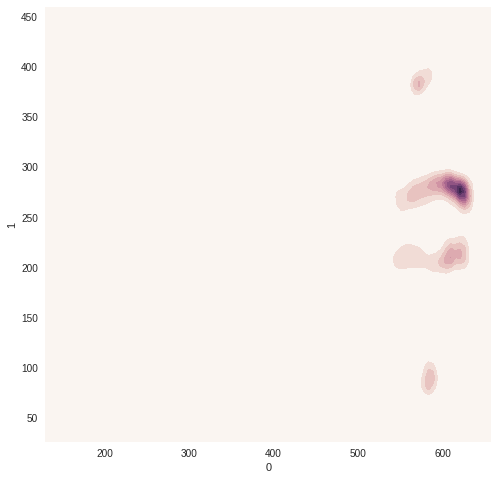

In [907]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(tracking_data[0].dropna(), tracking_data[1].dropna(), cmap=cmap, shade=True);

In [823]:
folder_name

'/media/zetdg/DATADRIVE2/proc/20100812000110100'

In [780]:
sessions_info[0]["experiment"]

{'date': '2005-07-25',
 'date_alias': 'ec012ec.11',
 'dset': 'hc-3',
 'experimenter': 'kenji',
 'session': 'ec012ec.187'}

In [781]:
sessions_info[0].keys()

dict_keys(['info', 'experiment', 'spike_activity', 'field_potential', 'electrodes', 'sorting_info'])

In [783]:
sessions_info[0]["experiment"]

{'date': '2005-07-25',
 'date_alias': 'ec012ec.11',
 'dset': 'hc-3',
 'experimenter': 'kenji',
 'session': 'ec012ec.187'}

{'4th': '81104',
 'animal': 'pin01',
 'date': '2005-11-23',
 'date_alias': 'pin01-11-04',
 'dset': 'hc-3',
 'experimenter': 'diba',
 'group': '2005-11-04',
 'region': ['CA1', 'CA1', 'CA1', 'CA1', 'CA3', 'CA3', 'CA3', 'CA3'],
 'session': '11-05_0-06-51'}

In [776]:
sessions_info[0]["spike_activity"]

{'sampling_rate': '20000',
 'session': 'ec012ec.187',
 'voltage_amplification': '1000',
 'voltage_bit': '16',
 'voltage_offset': '0',
 'voltage_range': '20'}

In [743]:
animal_name = [session_list[session_info["experiment"]["session"]]["animal"] for session_info in sessions_info]

In [714]:
session_list["11-04_22-31-40"]

{'4th': '81104',
 'animal': 'pin01',
 'date': 'pin01-11-04',
 'date_alias': 'pin01-11-04',
 'group': '2005-11-04',
 'region': ['CA1', 'CA1', 'CA1', 'CA1', 'CA3', 'CA3', 'CA3', 'CA3']}

In [614]:
[session_info["experiment"]["date"] for session_info in sessions_info]

['2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-07-25',
 '2005-08-17',
 '2005-08-17',
 '2005-08-17',
 '2005-08-17',
 '2005-08-17',
 '2005-08-17',
 '2005-08-18',
 '2005-08-18',
 '2005-08-18',
 '2005-08-26',
 '2005-08-26',
 '2005-08-26',
 '2005-08-26',
 '2005-09-07',
 '2005-09-07',
 '2005-09-07',
 '2005-09-07',
 '2005-09-07',
 '2005-08-26',
 '2005-08-26',
 '2005-08-26',
 '2005-08-26',
 '2005-08-26',
 '2005-08-18',
 '2005-08-18',
 '2005-08-30',
 '2005-08-30',
 '2005-08-30',
 '2005-08-18',
 '2005-08-18',
 '2005-08-18',
 '2005-08-18',
 '2005-08-18',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-29',
 '2005-08-30',
 '2005-08-30',
 '2005-08-30',
 '2005-08-30',
 '2005-08-31',
 '2005-08-31',
 '2005-08-31',
 '2005-08-

In [625]:
all_dict = dict()

for data in csv_data1:
    all_dict[data["date"]] = data
    all_dict[data["date"]]["all_sess"] = []
    all_dict[data["date"]]["all_task"] = []
    all_dict[data["date"]]["all_fam"] = []
    all_dict[data["date"]]["all_dur"] = []
    all_dict[data["date"]]["all_info"] = []

for data in csv_data2:
    if data["date"] in all_dict:
        all_dict[data["date"]].update(data)

for data in csv_data3:
    if data["date"] in all_dict:
        all_dict[data["date"]].update(data)
        all_dict[data["date"]]["all_sess"].append(all_dict[data["date"]]["sessionv"])
        all_dict[data["date"]]["all_task"].append(all_dict[data["date"]]["task"])
        all_dict[data["date"]]["all_fam"].append(all_dict[data["date"]]["fam"])
        all_dict[data["date"]]["all_dur"].append(all_dict[data["date"]]["dur"])
        all_dict[data["date"]]["all_info"].append(xml_content[data["date"]][all_dict[data["date"]]["sessionv"]])

for data in csv_data4:
    if data["date"] in all_dict:
        all_dict[data["date"]].update(data)


KeyError: 'ec012ec.188'

In [640]:
all_dict[data["date"]]

{'all_dur': [1096.4, 171.6],
 'all_fam': [10, 10],
 'all_info': [{'channel': {0: {'amplification': '1000',
     'channel': 0,
     'i': 0,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    1: {'amplification': '1000',
     'channel': 1,
     'i': 1,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    2: {'amplification': '1000',
     'channel': 2,
     'i': 2,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    3: {'amplification': '1000',
     'channel': 3,
     'i': 3,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    4: {'amplification': '1000',
     'channel': 4,
     'i': 4,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    5: {'amplificatio

In [637]:
all_dict[data["date"]]

{'all_dur': [1096.4, 171.6],
 'all_fam': [10, 10],
 'all_info': [{'channel': {0: {'amplification': '1000',
     'channel': 0,
     'i': 0,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    1: {'amplification': '1000',
     'channel': 1,
     'i': 1,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    2: {'amplification': '1000',
     'channel': 2,
     'i': 2,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    3: {'amplification': '1000',
     'channel': 3,
     'i': 3,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    4: {'amplification': '1000',
     'channel': 4,
     'i': 4,
     'nbit': '16',
     'offset': '0',
     'shank': 0,
     'skip': 0,
     'srate': '1250',
     'vrange': '20'},
    5: {'amplificatio

In [216]:
for key in ["ec012ec.11"]:
    for s,session_alias in enumerate(all_dict[key]["all_sess"]):
        
        session = dict()
        
        print(s,session_alias,'\n')
        session["date"] = all_dict[key]["all_info"][s]["exp"]["date"]
        session["alias"] = session_alias 
        session["experimenter"] = all_dict[key]["all_info"][s]["exp"]["experimenter"]
        
        
        for k in session:
            print(k,'\t=',session[k])
        break

0 ec012ec.187 

date 	= 2005-07-25
alias 	= ec012ec.187
experimenter 	= kenji


In [569]:
all_dict[key]["all_info"][s]["channel"][0]

TypeError: unhashable type: 'dict'

In [232]:
all_dict[key]["all_info"][s]["neuron"]

{'amplification': '1000',
 'nbit': '16',
 'nchannel': '33',
 'offset': '0',
 'srate': '1250',
 'vrange': '20'}

In [92]:
all_dict["ec013.51"]

{'animal': 'ec013',
 'date': 'ec013.51',
 'region': ['EC2', 'EC3', 'EC4', 'EC5', 'DGCA3', 'DGCA3', 'DGCA3', 'DGCA3']}

In [65]:
csv2 = [text[1] for text in csv_text[2]]
csv3 = [text[2] for text in csv_text[3]]

session_list = list();

for a,alias in enumerate(set(session_alias)):
    print(a,alias)
    info_01 = csv_text[2][csv2.index(alias)]
    info_02 = csv_text[3][csv3.index(alias)]
    
    print(info_01)
    print(info_02)
    
    session = dict()
    session["alias"]      = info_01[1]
    session["date_alias"] = info_01[0]
    session["group"]      = info_02[2]
    session["duration"]   = float(info_02[5])
    session["task"]       = info_02[3]
    session["task_fam"]   = int(info_02[4])
    
    session_list.append(session)

0 ec013.642
['ec013.37', 'ec013.642', '688955264', '-', '0']
['491', 'ec013.37', 'ec013.642', 'linear', '10', '1941.094']
1 ec013.737
['ec013.41', 'ec013.737', '505338954', '-', '0']
['566', 'ec013.41', 'ec013.737', 'linear', '10', '1224.704']
2 ec013.492
['ec013.31', 'ec013.492', '196949373', 'mpg', '138326020']
['375', 'ec013.31', 'ec013.492', 'plus', '1', '650.8544']
3 2007-3-29_13-04-03
['ec014.n329', '2007-3-29_13-04-03', '1368268698', '-', '0']
['1044', 'ec014.n329', '2007-3-29_13-04-03', 'sleep', '10', '1687.625']
4 ec013.857
['ec013.48', 'ec013.857', '510668808', 'mpg', '229427204']
['664', 'ec013.48', 'ec013.857', 'wheel', '10', '1068.646']
5 g01_maze04_MS.002
['g01_maze04', 'g01_maze04_MS.002', '2262873573', '-', '0']
['1523', 'g01_maze04', 'g01_maze04_MS.002', 'Mwheel', '10', '1252.4']
6 ec013.880
['ec013.49', 'ec013.880', '374077387', '-', '0']
['685', 'ec013.49', 'ec013.880', 'linear', '10', '1206.682']
7 ec012ec.533
['ec012ec.26', 'ec012ec.533', '213709098', 'm1v', '99722